# ライブラリのインポート

In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns

# 想定
### 実行PATHの設定
- `sales_dashboard` ディレクトリから実行

In [2]:
%cd {os.environ["PYTHONPATH"]}/{os.environ["PROJECTNAME"]}

D:\git_workspaces\portfolios\work1\sales_dashboard


# データの読み込み

### 生データのダウンロード方法
- [../data/stores_sales_forecasting/README.md](../data/stores_sales_forecasting/README.md)

### 生データファイルPATHを設定
- `sales_dashboard/data/stores_sales_forecasting/` 配下に格納した生データCSVファイル(`sales_data_sample.csv`)を利用する想定

### エンコードの設定
- 英語圏で作成されたファイルによく採用されている `ISO-8859-1` に設定

In [3]:
# 生データファイルPATH
RAW_DATA_FILE_PATH = f'{os.environ["PYTHONPATH"]}/data/stores_sales_forecasting/stores_sales_forecasting.csv'

# 読み込み
df_raw = pd.read_csv(RAW_DATA_FILE_PATH, encoding='ISO-8859-1')

# 各カラムの情報を確認
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# 各列の値や分布を確認
|  No | カラム名               | 型       | 意味・特徴                                         |
| :-: | :----------------- | :------ | :-------------------------------------------- |
|  0  | `ORDERNUMBER`      | int64   | 注文番号（各注文を一意に識別）                               |
|  1  | `QUANTITYORDERED`  | int64   | 注文数（1注文あたりの商品数）                               |
|  2  | `PRICEEACH`        | float64 | 商品単価                                          |
|  3  | `ORDERLINENUMBER`  | int64   | 注文内の商品行番号（1つの注文に複数商品がある場合に区別）                 |
|  4  | `SALES`            | float64 | 注文行の売上（`QUANTITYORDERED` × `PRICEEACH` などで計算） |
|  5  | `ORDERDATE`        | object  | 注文日（文字列型、日時として扱うには変換必要）                       |
|  6  | `STATUS`           | object  | 注文ステータス（Shipped, Cancelled など）                |
|  7  | `QTR_ID`           | int64   | 注文四半期（1=Q1, 2=Q2...）                          |
|  8  | `MONTH_ID`         | int64   | 注文月（1〜12）                                     |
|  9  | `YEAR_ID`          | int64   | 注文年（例: 2003, 2004）                            |
|  10 | `PRODUCTLINE`      | object  | 商品カテゴリ（Classic Cars, Motorcycles など）          |
|  11 | `MSRP`             | int64   | メーカー希望小売価格                                    |
|  12 | `PRODUCTCODE`      | object  | 商品コード                                         |
|  13 | `CUSTOMERNAME`     | object  | 顧客名                                           |
|  14 | `PHONE`            | object  | 顧客の電話番号                                       |
|  15 | `ADDRESSLINE1`     | object  | 住所（1行目）                                       |
|  16 | `ADDRESSLINE2`     | object  | 住所（2行目：NULL多め）                                |
|  17 | `CITY`             | object  | 市区町村名                                         |
|  18 | `STATE`            | object  | 州（NULL多め: 国によっては空欄）                           |
|  19 | `POSTALCODE`       | object  | 郵便番号（NULLもあり）                                 |
|  20 | `COUNTRY`          | object  | 国名                                            |
|  21 | `TERRITORY`        | object  | 販売地域（NULLもあり）                                 |
|  22 | `CONTACTLASTNAME`  | object  | 顧客担当者の名字                                      |
|  23 | `CONTACTFIRSTNAME` | object  | 顧客担当者の名前                                      |
|  24 | `DEALSIZE`         | object  | 取引規模（Small, Medium, Large など）                 |


### "Row ID"
- 

In [32]:
# 先頭の5サンプルを表示
display(df_raw["Row ID"].head())

# "Row ID"のユニーク数
unique_row_id_count = df_raw["Row ID"].nunique()

f'"Row ID"のユニーク数: {unique_row_id_count} / 全サンプル数: {len(df_raw)}'

0     1
1     2
2     4
3     6
4    11
Name: Row ID, dtype: int64

'"Row ID"のユニーク数: 2121 / 全サンプル数: 2121'

### "Order ID"
- 

0    CA-2016-152156
1    CA-2016-152156
2    US-2015-108966
3    CA-2014-115812
4    CA-2014-115812
Name: Order ID, dtype: object

ユニークな"Order ID"の数: 1764
重複する"Order ID"の数: 357 (全サンプルの 16.8 %)
重複するユニークな"Order IDの数": 295 (全"Order ID"の 16.7 %)


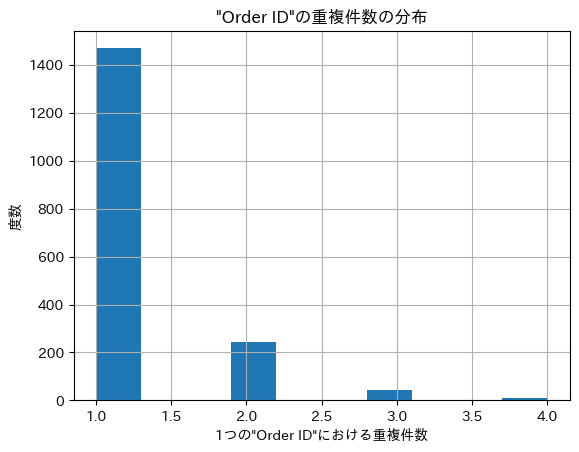

In [70]:
# 先頭の5サンプルを表示
display(df_raw["Order ID"].head())

# ユニークな"Order ID"の数
unique_order_id_count = df_raw["Order ID"].nunique()
print(f'ユニークな"Order ID"の数: {unique_order_id_count}')

# 重複する"Order ID"の数と割合
duplicated_order_id_count = df_raw["Order ID"].duplicated().sum()   # 数
duplicated_order_id_proportion = '{:.1f}'.format(duplicated_order_id_count / len(df_raw) * 100)   # 割合
print(f'重複する"Order ID"の数: {duplicated_order_id_count} (全サンプルの {duplicated_order_id_proportion} %)')

# 重複するユニークな"Order ID"の数と割合
duplicated_unique_order_id_count = (df_raw["Order ID"].value_counts() > 1).sum()   # 数
duplicated_unique_order_id_proportion = '{:.1f}'.format(duplicated_unique_order_id_count / unique_order_id_count * 100)   # 割合
print(f'重複するユニークな"Order IDの数": {duplicated_unique_order_id_count} (全"Order ID"の {duplicated_unique_order_id_proportion} %)')

# "Order ID"の重複件数の分布を可視化
df_raw["Order ID"].value_counts().hist()
plt.title('"Order ID"の重複件数の分布')
plt.xlabel('1つの"Order ID"における重複件数')
plt.ylabel('度数')
plt.show()

### "Order Date"
- 

0     11/8/2016
1     11/8/2016
2    10/11/2015
3      6/9/2014
4      6/9/2014
Name: Order Date, dtype: object

▼datetime型に変換:
"Order Date"(変換前) / "order_ymd"(変換後)


,Order Date,order_ymd
0,11/8/2016,2016-11-08
1,11/8/2016,2016-11-08
2,10/11/2015,2015-10-11
3,6/9/2014,2014-06-09
4,6/9/2014,2014-06-09



▼'yyyy-mm'フォーマットに加工:


,order_ymd,order_year_month
0,2016-11-08,2016-11
1,2016-11-08,2016-11
2,2015-10-11,2015-10
3,2014-06-09,2014-06
4,2014-06-09,2014-06


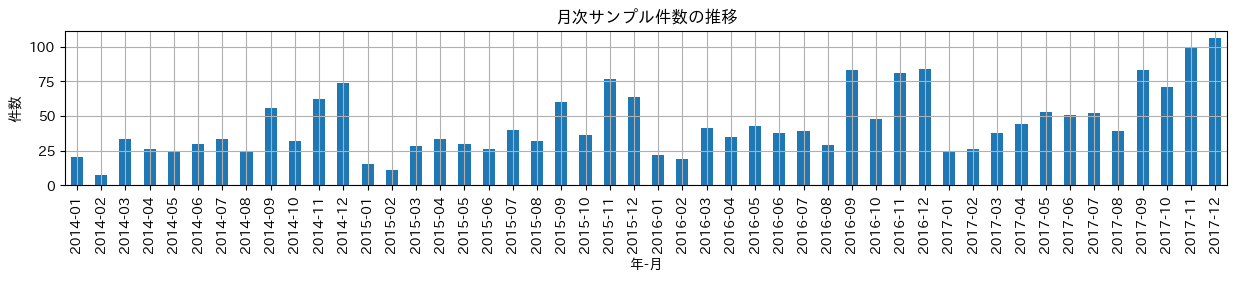

In [116]:
# 先頭の5サンプルを表示
print(df_raw["Order Date"].head())
print()

# 元のままだと文字列の状態なのでdatetime型に変換
df_order_date = df_raw[["Order Date"]].copy()
df_order_date["order_ymd"] = pd.to_datetime(df_order_date["Order Date"])
print('▼datetime型に変換:\n"Order Date"(変換前) / "order_ymd"(変換後)')
display(df_order_date.head())
print()

# 'yyyy-mm'フォーマットに加工
df_order_date["order_year_month"] = df_order_date["order_ymd"].dt.strftime('%Y-%m')
print("▼'yyyy-mm'フォーマットに加工:")
display(df_order_date[["order_ymd", "order_year_month"]].head())

# 月次サンプル件数の推移を可視化
order_year_month_count_series = df_order_date.groupby(["order_year_month"])["order_ymd"].count()   # 月次サンプル数を集計
order_year_month_count_series.plot.bar(   # 可視化
    title='月次サンプル件数の推移',
    xlabel='年-月',
    ylabel='件数',
    figsize=(15, 2),
    grid=True,
)
plt.show()

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity